In [2]:
import pandas as pd
import numpy as np
    
# reading behavioral scores:
#subject_behav = pd.read_csv("data/result01_pnc_data.csv", delimiter = ",")
# read file with FA components:
subject_behav = pd.read_csv("data/pnc_cognitive_response.csv", delimiter = ",")
#subject_behav = pd.read_csv("data/result01_pnc_data_merge.csv", delimiter = ",")
# print("subject_behav:")
# print(subject_behav[0:5])

#print(subject_info_behav[subject_info_behav.duplicated(subset = "SUBJID", keep = False)])

# accuracy_col = [
#     "ABF_A_ar_z", "ATT_A_ar_z", "WM_A_ar_z", 
#     "VMEM_A_ar_z", "FMEM_A_ar_z", "SMEM_A_ar_z", 
#     "LAN_A_ar_z", "NVR_A_ar_z", "SPA_A_ar_z", 
#     "EID_A_ar_z", "EDI_A_ar_z", "ADI_A_ar_z"]

# speed_col = [
#     "ABF_S_ar_z", "ATT_S_ar_z", "WM_S_ar_z", 
#     "VMEM_S_ar_z", "FMEM_S_ar_z", "SMEM_S_ar_z", 
#     "LAN_S_ar_z", "NVR_S_ar_z", "SPA_S_ar_z", 
#     "EID_S_ar_z", "EDI_S_ar_z", "ADI_S_ar_z", 
#     "MOT_S_ar_z", "SM_S_ar_z"]

# cog_score_label = accuracy_col + speed_col


cog_label_acc = [
    # executive control:
    "pcet_acc2",
    "pcpt_t_tp",
    "lnb_tp2",
    # episodic memory task:
    "pwmt_kiwrd_tot",
    "pfmt_ifac_tot",
    "volt_svt",
    # complex cognitive task:
    "pvrt_cr",
    "pmat_cr",
    "plot_tc",
    # social cognition task:
    "peit_cr",
    "pedt_a",
    "padt_a"
]

cog_label_speed = [
    # executive control:
    "pcet_rtcr",
    "pcpt_t_tprt",
    "lnb_rtc2",
    # episodic memory task:
    "pwmt_kiwrd_rtc",
    "pfmt_ifac_rtc",
    "volt_svtcrt",
    # complex cognitive task:
    "pvrt_rtcr",
    "pmat_rtcr",
    "plot_tcrt",
    # social cognition task:
    "peit_crt",
    "pedt_t",
    "padt_t",
    # sensorimotor speed task:
    "mp_mp2rtcr",
    "tap_tot"
]

cog_label_acc2 = [
    # executive control:
    "ABF",
    "ATT",
    "WM",
    # episodic memory task:
    "VMEM",
    "FMEM",
    "SMEM",
    # complex cognitive task:
    "LAN",
    "NVR",
    "SPA",
    # social cognition task:
    "EID",
    "EDI",
    "ADI"
]

cog_label_speed2 = [
    # executive control:
    "ABF",
    "ATT",
    "WM",
    # episodic memory task:
    "VMEM",
    "FMEM",
    "SMEM",
    # complex cognitive task:
    "LAN",
    "NVR",
    "SPA",
    # social cognition task:
    "EID",
    "EDI",
    "ADI",
    # sensorimotor speed task:
    "MOT",
    "SM"
]

cog_label = cog_label_acc + cog_label_speed
cog_label2 = [s + '_Accuracy' for s in cog_label_acc2] + [s + '_Speed' for s in cog_label_speed2]

#print(subject_info_behav[["mp_mp2rtcr", "tap_tot"]])
# revert the speed cognitive scores:
subject_behav[cog_label_speed] = subject_behav[cog_label_speed]*(-1)

file_dir = 'result/disorders/'
# disorder = 'smry_phb'
# disorder = 'HC'
# disorder = 'smry_ptd'
# disorder = 'smry_soc'
disorder = 'smry_dep'

scatter_ridge = pd.read_csv("result/allsubjects/out02_scatter_data_gender_ridge.csv", delimiter = ",")
scatter_svr = pd.read_csv("result/allsubjects/out02_scatter_data_gender_svr.csv", delimiter = ",")
scatter_gpr = pd.read_csv("result/allsubjects/out02_scatter_data_gender_gpr.csv", delimiter = ",")
scatter_dnn = pd.read_csv("result/allsubjects/out02_scatter_data_gender_dnn.csv", delimiter = ",")


In [4]:
scatter_ridge.head()

,feature,SUBJID,CV,chronological age,brain age,Sex,brain age fit sex,brain age fit
0,ALFF,601249791321,7,9.0,10.461285,F,11.141371,10.813930
1,ALFF,601155992510,8,16.0,14.264945,M,15.266611,15.429108
2,ALFF,606939668352,6,18.0,13.891279,F,16.043166,16.159106
3,ALFF,609025109832,5,21.0,16.289315,F,16.030567,16.763582
4,ALFF,608414632504,1,10.0,10.395401,M,11.256257,11.669449


In [3]:
def behav_correlation(subject_behav, scatter_data, cog_score_label, corr_label):
    scatter_data = scatter_data.loc[scatter_data['group'] == disorder]

    # merge behave file and subject info:
    subject_behav = subject_behav.merge(scatter_data, how = "inner", on = "SUBJID")
    subject_behav['age gap corr'] = subject_behav['predict age'] - subject_behav['brain age fit']
    # print(subject_behav_ridge[0:5])
    print(subject_behav.shape)
    
    # pd.DataFrame.corr() is nan compatible:
    corr_mat = subject_behav[corr_label + cog_score_label].corr()
    return((corr_mat.iloc[0, 1:]))

In [3]:
age_gap_behavacc_corr = pd.DataFrame(columns = ['ridge', 'SVR', 'GPR', 'DNN'])
corr_label = ['age gap corr']

age_gap_behavacc_corr['ridge'] = behav_correlation(subject_behav, scatter_ridge, cog_label_acc, corr_label)
age_gap_behavacc_corr['SVR'] = behav_correlation(subject_behav, scatter_svr, cog_label_acc, corr_label)
age_gap_behavacc_corr['GPR'] = behav_correlation(subject_behav, scatter_gpr, cog_label_acc, corr_label)
age_gap_behavacc_corr['DNN'] = behav_correlation(subject_behav, scatter_dnn, cog_label_acc, corr_label)

age_gap_behavacc_corr.index = cog_label_acc2
print(age_gap_behavacc_corr)


(67, 158)
(67, 158)
(67, 158)
(67, 158)
         ridge       SVR       GPR       DNN
ABF  -0.082733 -0.108943 -0.114555 -0.090585
ATT   0.103729  0.181461  0.118329  0.171119
WM    0.033414  0.079222  0.034370  0.114984
VMEM  0.045525  0.105166  0.057529  0.147794
FMEM -0.046127 -0.008398 -0.108283  0.026643
SMEM  0.076265 -0.053499  0.000251  0.141470
LAN   0.208614  0.191694  0.186606  0.280322
NVR  -0.133831 -0.129469 -0.166166 -0.093577
SPA  -0.112882 -0.202861 -0.197669 -0.135110
EID  -0.162219 -0.081411 -0.149648 -0.026834
EDI   0.267217  0.253760  0.242631  0.276335
ADI   0.275354  0.249763  0.239004  0.226595


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_data = age_gap_behavacc_corr.reset_index()
plot_data = pd.melt(plot_data, id_vars=['index'], var_name = 'method', value_name = 'correlation')
plot_data.columns = ['cognitive score accuracy', 'method', 'correlation']
# print(plot_data)

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x = "cognitive score accuracy", y = "correlation", hue = 'method', data = plot_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title("Age gap corr")

Text(0.5, 1.0, 'Age gap corr')

In [5]:
age_gap_behavspeed_corr = pd.DataFrame(columns = ['ridge', 'SVR', 'GPR', 'DNN'])
corr_label = ['age gap corr']

age_gap_behavspeed_corr['ridge'] = behav_correlation(subject_behav, scatter_ridge, cog_label_speed, corr_label)
age_gap_behavspeed_corr['SVR'] = behav_correlation(subject_behav, scatter_svr, cog_label_speed, corr_label)
age_gap_behavspeed_corr['GPR'] = behav_correlation(subject_behav, scatter_gpr, cog_label_speed, corr_label)
age_gap_behavspeed_corr['DNN'] = behav_correlation(subject_behav, scatter_dnn, cog_label_speed, corr_label)

age_gap_behavspeed_corr.index = cog_label_speed2
print(age_gap_behavspeed_corr)


(67, 158)
(67, 158)
(67, 158)
(67, 158)
         ridge       SVR       GPR       DNN
ABF  -0.237011 -0.165385 -0.177250 -0.155676
ATT  -0.005765  0.040048 -0.023773 -0.014820
WM    0.020221 -0.005696 -0.001554 -0.048160
VMEM  0.128868  0.151252  0.069711  0.012402
FMEM -0.113024 -0.079441 -0.123177 -0.129256
SMEM  0.002229 -0.010173 -0.009932 -0.058343
LAN   0.035408  0.122166  0.067557  0.074715
NVR   0.137170  0.142814  0.179769  0.213051
SPA  -0.162675 -0.165804 -0.148897 -0.153239
EID   0.015829  0.081395  0.042978  0.056373
EDI   0.065031  0.148910  0.140225  0.117673
ADI  -0.144512 -0.072132 -0.114764 -0.115494
MOT  -0.019383 -0.045769 -0.056577 -0.160391
SM   -0.203772 -0.188221 -0.116958 -0.102862


Text(0.5, 1.0, 'Age gap corr')

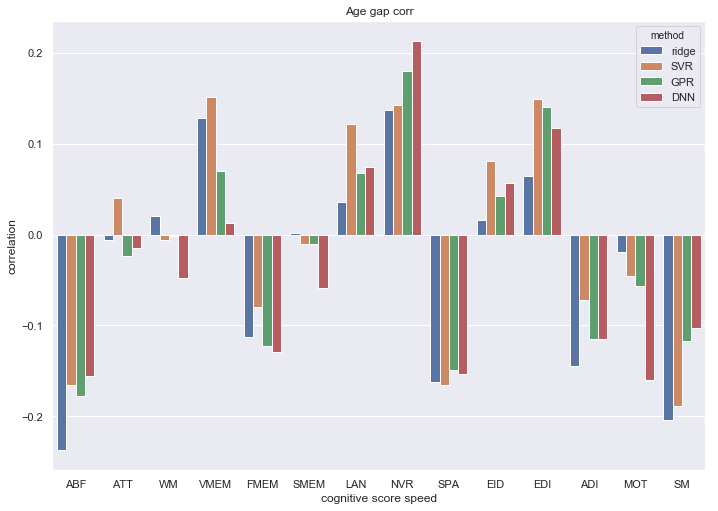

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_data = age_gap_behavspeed_corr.reset_index()
plot_data = pd.melt(plot_data, id_vars=['index'], var_name = 'method', value_name = 'correlation')
plot_data.columns = ['cognitive score speed', 'method', 'correlation']
# print(plot_data)

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x = "cognitive score speed", y = "correlation", hue = 'method', data = plot_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title("Age gap corr")

In [7]:
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing


def linear_regression_rfe(subject_behav, scatter_data, cog_score_label, 
                          y_label, n_features = 5, save_data = False):    
    
    scatter_data = scatter_data.loc[scatter_data['group'] == disorder]

    # merge behave file and subject info:
    subject_behav = subject_behav.merge(scatter_data, how = "inner", on = ["SUBJID", "Sex"])
    
    subject_behav['age gap corr'] = subject_behav['predict age'] - subject_behav['brain age fit']
    subject_behav['age gap'] = subject_behav['predict age'] - subject_behav['age']
    # print(any(np.isnan(y)))
    # print(any(np.isnan(X)))
    subject_behav_tosave = subject_behav[["SUBJID", 'Sex', 'age', 'age gap corr', 
                                           'age gap', 'predict age', 'brain age fit'] + cog_score_label]
    
    if y_label == 'age gap':
        print('add chronological age as predictors...')
        cog_score_label = cog_score_label + ['age']
    else:
        cog_score_label = cog_score_label
        
    X_label = cog_score_label + ["Sex"]
    
    subject_behav.replace({'Sex': {'F': 0, 'M': 1}}, inplace = True)
    X = subject_behav[X_label].values
    y = subject_behav[y_label].values

    nan_idx = np.isnan(X).any(axis=1)
    y = y[~nan_idx]
    X = X[~nan_idx,:]
    X_scaled = preprocessing.scale(X)

    estimator = LinearRegression()
    #selector = RFECV(estimator, step=1, cv=5,  min_features_to_select=5)
    selector = RFECV(estimator, step=1, cv=5)
    #selector = RFE(estimator, step=1, n_features_to_select=n_features)
    
    selector = selector.fit(X_scaled, y)
    
    #print(selector.support_)
    #print(selector.ranking_)

    coefs = selector.estimator_.coef_
#     print(coefs)
    index = selector.support_
    label = [X_label[i] for i in range(len(X_label)) if index[i]]
#     print(label)
    
    rsquared = selector.score(X_scaled, y)
    
    coefs = pd.DataFrame(coefs, index = label, columns = ['beta'])
    
    if save_data:
        return((coefs, rsquared, subject_behav_tosave))
    else:
        return((coefs, rsquared))

def linear_regression(subject_behav, scatter_data, cog_score_label, y_label):
    from sklearn.linear_model import LinearRegression
    from sklearn import preprocessing
    
    scatter_data = scatter_data.loc[scatter_data['group'] == disorder]
    
    # merge behave file and subject info:
    subject_behav = subject_behav.merge(scatter_data, how = "inner", on = "SUBJID")
    subject_behav['age gap'] = subject_behav['predict age'] - subject_behav['chronological age']
    subject_behav.replace({'Sex': {'F': 0, 'M': 1}}, inplace = True)
    
    # print(any(np.isnan(y)))
    # print(any(np.isnan(X)))
    
    if y_label == 'age gap':
        print('add chronological age as predictors...')
        cog_score_label = cog_score_label + ['age']
    else:
        cog_score_label = cog_score_label
        
    X = subject_behav[cog_score_label + ["Sex"]].values
    y = subject_behav[y_label].values

    nan_idx = np.isnan(X).any(axis=1)
    y = y[~nan_idx]
    X = X[~nan_idx,:]
    X_scaled = preprocessing.scale(X)

    estimator = LinearRegression()
    estimator = estimator.fit(X_scaled, y)

    coefs = estimator_.coef_
    
    rsquared = selector.score(X_scaled, y)
    coefs = pd.DataFrame(coefs, index = cog_score_label + ["Sex"], columns = ['beta'])
    return((coefs, rsquared))

In [8]:
brainage_behav_rsquare = pd.DataFrame(index = ['rsquared'], columns = ['ridge', 'SVR', 'GPR', 'DNN'])
brainage_behav_coef = pd.DataFrame(columns = ['ridge', 'SVR', 'GPR', 'DNN'])

column_name1 = ["SUBJID", 'Sex', 'chronological age', 'age gap corr', 'age gap', 'brain age', 'brain age fit'] 

coefs_ridge, brainage_behav_rsquare.loc['rsquared','ridge'], subject_behav_ridge = \
linear_regression_rfe(subject_behav, scatter_ridge,cog_label, y_label = 'predict age',save_data = True)

subject_behav_ridge.columns = column_name1  + cog_label2
subject_behav_ridge.to_csv(file_dir + 'out03_subject_behav_ridge_' + disorder + '.csv', index = False)


coefs_svr, brainage_behav_rsquare.loc['rsquared','SVR'], subject_behav_svr = \
linear_regression_rfe(subject_behav, scatter_svr, cog_label, y_label = 'predict age', save_data = True)

subject_behav_svr.columns = column_name1 + cog_label2
subject_behav_svr.to_csv(file_dir + 'out03_subject_behav_svr_' + disorder + '.csv', index = False)


coefs_gpr, brainage_behav_rsquare.loc['rsquared','GPR'], subject_behav_gpr = \
linear_regression_rfe(subject_behav, scatter_gpr,cog_label, y_label = 'predict age', save_data = True)

subject_behav_gpr.columns = column_name1  + cog_label2
subject_behav_gpr.to_csv(file_dir + 'out03_subject_behav_gpr_' + disorder + '.csv', index = False)


coefs_dnn, brainage_behav_rsquare.loc['rsquared','DNN'], subject_behav_dnn = \
linear_regression_rfe(subject_behav, scatter_dnn,cog_label, y_label = 'predict age', save_data = True)

subject_behav_dnn.columns = column_name1 + cog_label2
subject_behav_dnn.to_csv(file_dir + 'out03_subject_behav_dnn_' + disorder + '.csv', index = False)


coefs_chro, brainage_behav_rsquare.loc['rsquared','Chronological age'], subject_behav_dnn = \
linear_regression_rfe(subject_behav, scatter_dnn, cog_label, y_label = 'age', save_data = True)

brainage_behav_coef = pd.concat([coefs_ridge, coefs_svr, coefs_gpr, coefs_dnn, coefs_chro], 
                                keys = ['ridge', 'SVR', 'GPR', 'DNN', 'Chronological age'])


brainage_behav_coef = brainage_behav_coef
brainage_behav_rsquare = brainage_behav_rsquare
print(brainage_behav_coef)
print(brainage_behav_rsquare)

                                      beta
ridge             pvrt_cr         0.658795
SVR               pvrt_rtcr       0.551367
GPR               volt_svt       -0.411601
                  pvrt_cr         0.918349
                  pmat_cr        -0.566183
                  plot_tc        -0.341721
                  peit_cr        -0.280128
                  pedt_a          0.231726
                  pcet_rtcr      -0.860925
                  pwmt_kiwrd_rtc  0.499011
                  pvrt_rtcr       0.650215
                  padt_t         -0.589799
                  tap_tot        -0.635629
                  Sex            -0.571313
DNN               pvrt_cr         1.097897
                  pmat_cr        -0.888972
                  pcet_rtcr      -1.244207
                  pvrt_rtcr       0.926662
                  tap_tot        -0.696045
                  Sex            -0.841693
Chronological age pfmt_ifac_tot   0.643297
                  volt_svt       -0.522657
           

In [9]:
behav_coef = pd.concat([coefs_ridge, coefs_svr, coefs_gpr, coefs_dnn, coefs_chro], axis = 1, 
                       keys = ['ridge', 'SVR', 'GPR', 'DNN', 'Chronological age'], sort = False)

behav_coef.columns =  behav_coef.columns.droplevel(1)

behav_coef = pd.concat([behav_coef, brainage_behav_rsquare], axis = 0)

agegap_behav_coef = behav_coef
d = dict(zip(cog_label, cog_label2))
agegap_behav_coef.rename(index = d, inplace = True)

rows = list(agegap_behav_coef.index)

#rows.insert(0, rows.pop(rows.index('chronological age')))
# rows.insert(0, rows.pop(rows.index('Sex')))

agegap_behav_coef = agegap_behav_coef.reindex(index= rows)


print(agegap_behav_coef)

agegap_behav_coef.to_csv(file_dir + 'brain_age_behav_coef' + disorder + '.csv')

                   ridge        SVR       GPR       DNN  Chronological age
LAN_Accuracy    0.658795        NaN  0.918349    1.0979                NaN
LAN_Speed            NaN   0.551367  0.650215  0.926662           0.568235
SMEM_Accuracy        NaN        NaN -0.411601       NaN          -0.522657
NVR_Accuracy         NaN        NaN -0.566183 -0.888972                NaN
SPA_Accuracy         NaN        NaN -0.341721       NaN                NaN
EID_Accuracy         NaN        NaN -0.280128       NaN                NaN
EDI_Accuracy         NaN        NaN  0.231726       NaN                NaN
ABF_Speed            NaN        NaN -0.860925  -1.24421          -0.603182
VMEM_Speed           NaN        NaN  0.499011       NaN           0.688421
ADI_Speed            NaN        NaN -0.589799       NaN                NaN
SM_Speed             NaN        NaN -0.635629 -0.696045          -0.528113
Sex                  NaN        NaN -0.571313 -0.841693                NaN
FMEM_Accuracy        NaN 

Text(0.5, 1.0, 'Brain age')

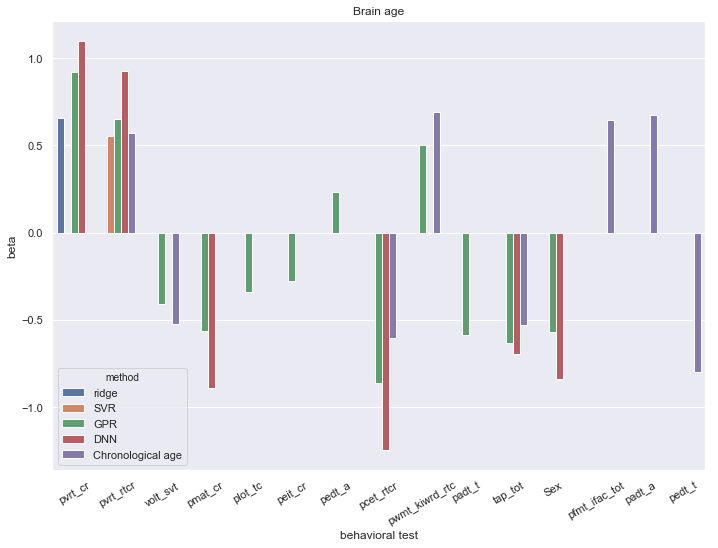

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

age_gap_behav_coef = brainage_behav_coef.drop(index='chronological age', level = 1)
age_gap_behav_coef.index.names = ['method', 'behavioral test']
age_gap_behav_coef = age_gap_behav_coef.reset_index()


sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x = 'behavioral test', y = "beta", hue = 'method', data = age_gap_behav_coef)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title("Brain age")

In [11]:
## regression RFE for corrected brain age gap:

In [12]:
behav_rsquare = pd.DataFrame(index = ['rsquared'], columns = ['ridge', 'SVR', 'GPR', 'DNN'])
behav_coef = pd.DataFrame(columns = ['ridge', 'SVR', 'GPR', 'DNN'])

coefs_ridge, behav_rsquare.loc['rsquared','ridge'] = linear_regression_rfe(subject_behav, scatter_ridge, cog_label, y_label = 'age gap corr')
coefs_svr, behav_rsquare.loc['rsquared','SVR'] = linear_regression_rfe(subject_behav, scatter_svr, cog_label, y_label = 'age gap corr')
coefs_gpr, behav_rsquare.loc['rsquared','GPR'] = linear_regression_rfe(subject_behav, scatter_gpr, cog_label, y_label = 'age gap corr')
coefs_dnn, behav_rsquare.loc['rsquared','DNN'] = linear_regression_rfe(subject_behav, scatter_dnn, cog_label, y_label = 'age gap corr')


In [13]:
behav_coef = pd.concat([coefs_ridge, coefs_svr, coefs_gpr, coefs_dnn], axis = 1, 
                       keys = ['ridge', 'SVR', 'GPR', 'DNN'], sort = False)

behav_coef.columns =  behav_coef.columns.droplevel(1)

behav_coef = pd.concat([behav_coef, behav_rsquare], axis = 0)

agegap_behav_coef = behav_coef
d = dict(zip(cog_label, cog_label2))
agegap_behav_coef.rename(index = d, inplace = True)

rows = list(agegap_behav_coef.index)

#rows.insert(0, rows.pop(rows.index('chronological age')))
#rows.insert(0, rows.pop(rows.index('Sex')))

agegap_behav_coef = agegap_behav_coef.reindex(index= rows)


print(agegap_behav_coef)

agegap_behav_coef.to_csv(file_dir + 'agegapcorr_behav_coef' + disorder + '.csv')

                 ridge        SVR       GPR       DNN
LAN_Accuracy   0.94033        NaN  0.699304   1.02418
NVR_Accuracy -0.519819        NaN -0.550501 -0.866215
ABF_Speed    -0.949081        NaN  -0.70326 -0.581296
EDI_Speed     0.645523        NaN  0.653554       NaN
ADI_Speed    -0.413749        NaN -0.362314       NaN
SPA_Accuracy       NaN  -0.449956       NaN       NaN
rsquared      0.293457  0.0464933  0.262941  0.217468


In [14]:
plot_data = agegap_behav_coef.reset_index()

plot_data = pd.melt(plot_data, id_vars = ['index'], value_vars = ['ridge', 'SVR', 'GPR', 'DNN'], 
                    var_name = 'Method', value_name = 'beta')
plot_data.rename(columns = {'index':'behavioral test'}, inplace = True)

Text(0.5, 1.0, 'Age gap corr')

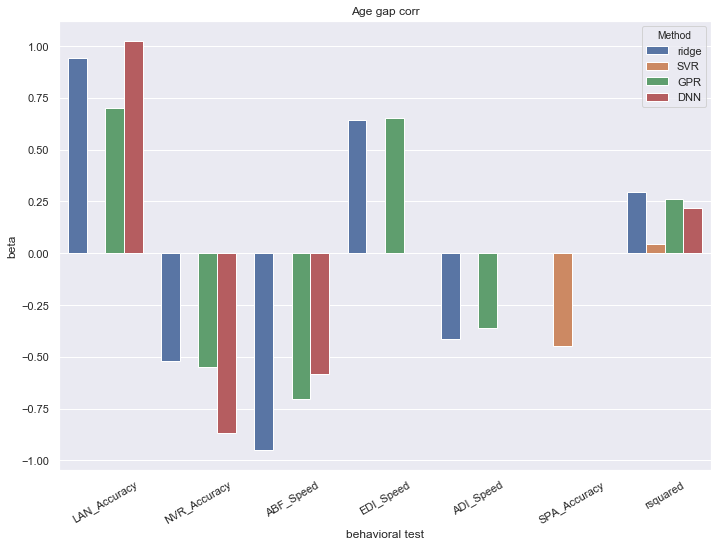

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x = 'behavioral test', y = "beta", hue = 'Method', data = plot_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title("Age gap corr")

In [16]:
behav_rsquare = pd.DataFrame(index = ['rsquared'], columns = ['ridge', 'SVR', 'GPR', 'DNN', 'Chronological age'])
#behav_coef = pd.DataFrame(columns = ['ridge', 'SVR', 'GPR', 'DNN'])

coefs_ridge, behav_rsquare.loc['rsquared','ridge'] = linear_regression_rfe(subject_behav, scatter_ridge, cog_label, y_label = 'brain age fit')
coefs_svr, behav_rsquare.loc['rsquared','SVR'] = linear_regression_rfe(subject_behav, scatter_svr, cog_label, y_label = 'brain age fit')
coefs_gpr, behav_rsquare.loc['rsquared','GPR'] = linear_regression_rfe(subject_behav, scatter_gpr, cog_label, y_label = 'brain age fit')
coefs_dnn, behav_rsquare.loc['rsquared','DNN'] = linear_regression_rfe(subject_behav, scatter_dnn, cog_label, y_label = 'brain age fit')

coefs_chro, behav_rsquare.loc['rsquared','Chronological age'] = linear_regression_rfe(subject_behav, scatter_dnn, cog_label, y_label = 'age')


In [17]:
behav_coef = pd.concat([coefs_ridge, coefs_svr, coefs_gpr, coefs_dnn, coefs_chro], axis = 1, 
                       keys = ['ridge', 'SVR', 'GPR', 'DNN', 'Chronological age'], sort = False)

behav_coef.columns =  behav_coef.columns.droplevel(1)

behav_coef = pd.concat([behav_coef, behav_rsquare], axis = 0)

agegap_behav_coef = behav_coef
d = dict(zip(cog_label, cog_label2))
agegap_behav_coef.rename(index = d, inplace = True)

rows = list(agegap_behav_coef.index)

#rows.insert(0, rows.pop(rows.index('chronological age')))
rows.insert(0, rows.pop(rows.index('Sex')))

agegap_behav_coef = agegap_behav_coef.reindex(index= rows)


print(agegap_behav_coef)

agegap_behav_coef.to_csv(file_dir + 'brain_age_fit_behav_coef' + disorder + '.csv')

                  ridge       SVR       GPR       DNN Chronological age
Sex           -0.539328 -0.495676 -0.570045  -0.72265               NaN
ABF_Speed     -0.270474 -0.184227 -0.280885 -0.294504         -0.603182
VMEM_Speed     0.417383  0.284958  0.433878  0.452506          0.688421
LAN_Speed      0.407211  0.278845   0.42384  0.439042          0.568235
EDI_Speed     -0.306128  -0.20864 -0.317993 -0.332949         -0.800538
SM_Speed      -0.383991 -0.261929 -0.399017 -0.416981         -0.528113
FMEM_Accuracy       NaN       NaN       NaN       NaN          0.643297
SMEM_Accuracy       NaN       NaN       NaN       NaN         -0.522657
ADI_Accuracy        NaN       NaN       NaN       NaN          0.673087
rsquared       0.659262  0.703862  0.661561  0.687751          0.646851


In [18]:
plot_data = agegap_behav_coef.reset_index()

plot_data = pd.melt(plot_data, id_vars = ['index'], value_vars = ['ridge', 'SVR', 'GPR', 'DNN', 'Chronological age'], 
                    var_name = 'Method', value_name = 'beta')
plot_data.rename(columns = {'index':'behavioral test'}, inplace = True)

Text(0.5, 1.0, 'Brain age fit')

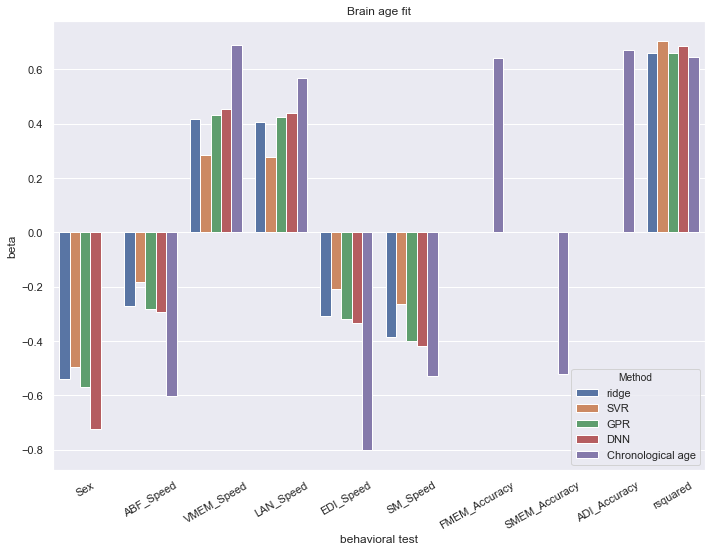

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x = 'behavioral test', y = "beta", hue = 'Method', data = plot_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title("Brain age fit")

In [20]:
def linear_regression_rfe_corr(subject_behav, scatter_data, cog_score_label, 
                          y_label, n_features = 5, save_data = False):    
    
    scatter_data = scatter_data.loc[scatter_data['group'] == disorder]

    # merge behave file and subject info:
    subject_behav = subject_behav.merge(scatter_data, how = "inner", on = ["SUBJID", "Sex"])
    
    subject_behav['age gap corr'] = subject_behav['predict age'] - subject_behav['brain age fit']
    subject_behav['age gap'] = subject_behav['predict age'] - subject_behav['age']
    # print(any(np.isnan(y)))
    # print(any(np.isnan(X)))
    subject_behav_tosave = subject_behav[ ["SUBJID", 'Sex', 'age', 'age gap corr', 
                                           'age gap', 'predict age', 'brain age fit'] + cog_score_label]
    
    if y_label == 'age gap':
        print('add chronological age as predictors...')
        cog_score_label = cog_score_label + ['age']
    elif y_label == 'age gap corr':
        print('add brain age fit as predictors...')
        cog_score_label = cog_score_label + ['brain age fit']
    else:
        cog_score_label = cog_score_label
        
    X_label = cog_score_label + ["Sex"]
    
    subject_behav.replace({'Sex': {'F': 0, 'M': 1}}, inplace = True)
    X = subject_behav[X_label].values
    y = subject_behav[y_label].values

    nan_idx = np.isnan(X).any(axis=1)
    y = y[~nan_idx]
    X = X[~nan_idx,:]
    X_scaled = preprocessing.scale(X)

    estimator = LinearRegression()
    #selector = RFECV(estimator, step=1, cv=5,  min_features_to_select=5)
    selector = RFECV(estimator, step=1, cv=5)
    #selector = RFE(estimator, step=1, n_features_to_select=n_features)
    
    selector = selector.fit(X_scaled, y)
    
    #print(selector.support_)
    #print(selector.ranking_)

    coefs = selector.estimator_.coef_
#     print(coefs)
    index = selector.support_
    label = [X_label[i] for i in range(len(X_label)) if index[i]]
#     print(label)
    
    rsquared = selector.score(X_scaled, y)
    
    coefs = pd.DataFrame(coefs, index = label, columns = ['beta'])
    
    if save_data:
        return((coefs, rsquared, subject_behav_tosave))
    else:
        return((coefs, rsquared))

In [21]:
behav_rsquare = pd.DataFrame(index = ['rsquared'], columns = ['ridge', 'SVR', 'GPR', 'DNN'])
behav_coef = pd.DataFrame(columns = ['ridge', 'SVR', 'GPR', 'DNN'])

coefs_ridge, behav_rsquare.loc['rsquared','ridge'] = linear_regression_rfe_corr(subject_behav, scatter_ridge, cog_label, y_label = 'age gap corr')
coefs_svr, behav_rsquare.loc['rsquared','SVR'] = linear_regression_rfe_corr(subject_behav, scatter_svr, cog_label, y_label = 'age gap corr')
coefs_gpr, behav_rsquare.loc['rsquared','GPR'] = linear_regression_rfe_corr(subject_behav, scatter_gpr, cog_label, y_label = 'age gap corr')
coefs_dnn, behav_rsquare.loc['rsquared','DNN'] = linear_regression_rfe_corr(subject_behav, scatter_dnn, cog_label, y_label = 'age gap corr')


add brain age fit as predictors...
add brain age fit as predictors...
add brain age fit as predictors...
add brain age fit as predictors...


In [22]:
behav_coef = pd.concat([coefs_ridge, coefs_svr, coefs_gpr, coefs_dnn], axis = 1, 
                       keys = ['ridge', 'SVR', 'GPR', 'DNN'], sort = False)

behav_coef.columns =  behav_coef.columns.droplevel(1)

behav_coef = pd.concat([behav_coef, behav_rsquare], axis = 0)

agegap_behav_coef = behav_coef
d = dict(zip(cog_label, cog_label2))
agegap_behav_coef.rename(index = d, inplace = True)

rows = list(agegap_behav_coef.index)

#rows.insert(0, rows.pop(rows.index('chronological age')))
#rows.insert(0, rows.pop(rows.index('Sex')))

agegap_behav_coef = agegap_behav_coef.reindex(index= rows)


print(agegap_behav_coef)

agegap_behav_coef.to_csv(file_dir + 'age_gap_corr2_behav_coef' + disorder + '.csv')

                  ridge       SVR        GPR       DNN
LAN_Accuracy   0.733596       NaN        NaN   1.13349
ABF_Speed     -0.750511       NaN        NaN -0.494402
brain age fit       NaN  0.714322        NaN  0.452545
NVR_Accuracy        NaN       NaN  -0.374881 -0.743792
WM_Accuracy         NaN       NaN        NaN -0.701845
EDI_Accuracy        NaN       NaN        NaN   1.01844
ADI_Accuracy        NaN       NaN        NaN -0.746655
rsquared       0.165852  0.117176  0.0416586  0.329445


In [23]:
plot_data = agegap_behav_coef.reset_index()

plot_data = pd.melt(plot_data, id_vars = ['index'], value_vars = ['ridge', 'SVR', 'GPR', 'DNN'], 
                    var_name = 'Method', value_name = 'beta')
plot_data.rename(columns = {'index':'behavioral test'}, inplace = True)

Text(0.5, 1.0, 'Age gap corr')

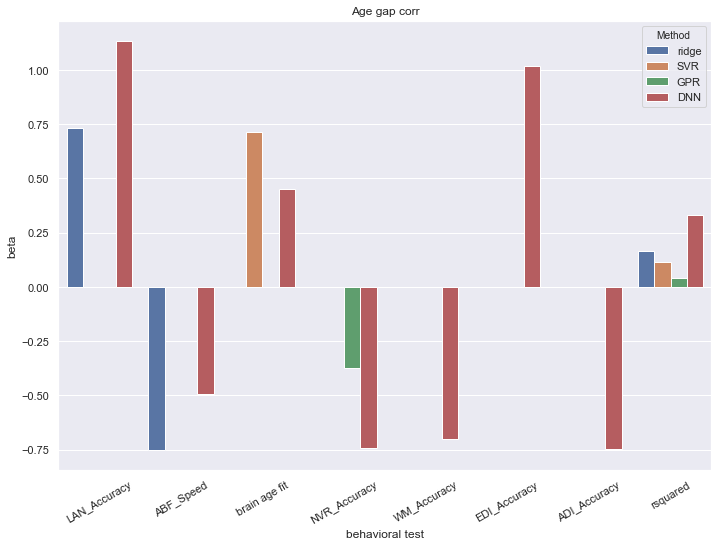

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x = 'behavioral test', y = "beta", hue = 'Method', data = plot_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title("Age gap corr")